Relatório de estudos:
para ler dados, podemos utilizar o delimitedfiles e a função readdlm()
é mais fácil retirar 6 linhas que possuem atributos faltosos do que modificar todos os algoritmos para ignorar esses valores

Links uteis:
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
https://www.analyticsvidhya.com/blog/2017/10/comprehensive-tutorial-learn-data-science-julia-from-scratch/
https://nextjournal.com/leandromartinez98/tips-to-create-beautiful-publication-quality-plots-in-julia

# Descrição dos dados

## Informação detalhada dos atributos

|Atributo|Descrição                                                           |Tipo    |
|--------|:------------------------------------------------------------------:|-------:|
|Age     |idade em anos                                                       |numérico|
|sex     | (1 = homem; 0 = mulher)                                             |nominal |
|cp      |tipo de dor no peito                                                |nominal |
|trestbps|pressão arterial em repouso (em mm Hg na admissão no hospital)      |numérico|
|chol    |colestoral sérico em mg / dl                                        |numérico|
|fbs     |(açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)|nominal |
|restecg |resultados eletrocardiográficos em repouso                          |nominal |
|thalach |frequência cardíaca máxima atingida                                 |numérico|
|exang   |angina induzida pelo exercício (1 = sim; 0 = não)                   |nominal |
|oldpeak |depressão do ST induzida por exercício em relação ao repouso        |numérico|
|slope   |a inclinação do segmento ST do pico do exercício                    |nominal |
|ca      |número de vasos principais (0–3) coloridos por flourosopy           |numérico|
|thal    |3 = normal; 6 = defeito fixo; 7 = defeito reversível                |nominal |
|alvo    |tem doença ou não (1 = sim, 0 = não)                                |nominal |

## ranges e tipos de dados
|atributos | tipos e ranges|
|----------|:-----:|
|Age      |numérico|
|sex      |numérico|
|cp       |numérico|
|trestbps |numérico|
|chol     |numérico|
|fbs      |numérico|
|restecg  |numérico|
|thalach  |numérico|
|exang    |numérico|
|oldpeak  |numérico|
|slope    |categórico|
|ca       |categórico|
|thal     |numérico|


In [43]:
using Plots, DataFrames, CSV
#buscando o arquivo e colocando o header no dataframe
headers = ["age", "sex ", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "alvo"]

df = DataFrame(CSV.File("processed.cleveland.csv"; header = headers))
show(df, allcols=true)

303×14 DataFrame
│ Row │ age     │ sex     │ cp      │ trestbps │ chol    │ fbs     │ restecg │
│     │ Float64 │ Float64 │ Float64 │ Float64  │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ 63.0    │ 1.0     │ 1.0     │ 145.0    │ 233.0   │ 1.0     │ 2.0     │
│ 2   │ 67.0    │ 1.0     │ 4.0     │ 160.0    │ 286.0   │ 0.0     │ 2.0     │
│ 3   │ 67.0    │ 1.0     │ 4.0     │ 120.0    │ 229.0   │ 0.0     │ 2.0     │
│ 4   │ 37.0    │ 1.0     │ 3.0     │ 130.0    │ 250.0   │ 0.0     │ 0.0     │
│ 5   │ 41.0    │ 0.0     │ 2.0     │ 130.0    │ 204.0   │ 0.0     │ 2.0     │
│ 6   │ 56.0    │ 1.0     │ 2.0     │ 120.0    │ 236.0   │ 0.0     │ 0.0     │
│ 7   │ 62.0    │ 0.0     │ 4.0     │ 140.0    │ 268.0   │ 0.0     │ 2.0     │
│ 8   │ 57.0    │ 0.0     │ 4.0     │ 120.0    │ 354.0   │ 0.0     │ 0.0     │
│ 9   │ 63.0    │ 1.0     │ 4.0     │ 130.0    │ 254.0   │ 0.0     │ 2.0     │
│ 10  │ 53.0    │ 1.0     │ 4.0    

In [36]:
g1 = df[!, 12]
g2 = df[!, 13]

g1 = map(x -> x == "?" ? x = Missing : x = x, g1)
g2 = map(x -> x == "?" ? x = Missing : x = x, g2)

df[!, 12] = g1
df[!, 13] = g2

df = dropmissing!(copy(df))

show(df, allcols=true)

303×14 DataFrame
│ Row │ age     │ sex     │ cp      │ trestbps │ chol    │ fbs     │ restecg │
│     │ Float64 │ Float64 │ Float64 │ Float64  │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ 63.0    │ 1.0     │ 1.0     │ 145.0    │ 233.0   │ 1.0     │ 2.0     │
│ 2   │ 67.0    │ 1.0     │ 4.0     │ 160.0    │ 286.0   │ 0.0     │ 2.0     │
│ 3   │ 67.0    │ 1.0     │ 4.0     │ 120.0    │ 229.0   │ 0.0     │ 2.0     │
│ 4   │ 37.0    │ 1.0     │ 3.0     │ 130.0    │ 250.0   │ 0.0     │ 0.0     │
│ 5   │ 41.0    │ 0.0     │ 2.0     │ 130.0    │ 204.0   │ 0.0     │ 2.0     │
│ 6   │ 56.0    │ 1.0     │ 2.0     │ 120.0    │ 236.0   │ 0.0     │ 0.0     │
│ 7   │ 62.0    │ 0.0     │ 4.0     │ 140.0    │ 268.0   │ 0.0     │ 2.0     │
│ 8   │ 57.0    │ 0.0     │ 4.0     │ 120.0    │ 354.0   │ 0.0     │ 0.0     │
│ 9   │ 63.0    │ 1.0     │ 4.0     │ 130.0    │ 254.0   │ 0.0     │ 2.0     │
│ 10  │ 53.0    │ 1.0     │ 4.0    

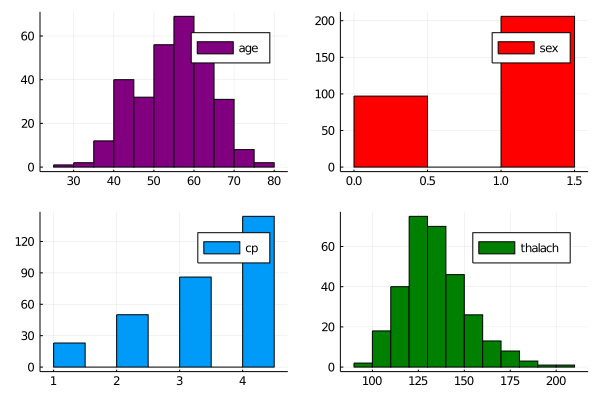

In [53]:
labels2 = ["women", "men"]
bar!()
h1 = histogram(df[!, 1], label = "age", colour="purple")
h2 = histogram(df[!, 2], label = "sex", colour="red")
h3 = histogram(df[!, 3], label = "cp", clour="blue")
h4 = histogram(df[!, 4], label = "thalach", colour="green")
plot(h1, h2, h3,h4, layout=4, grid= true)

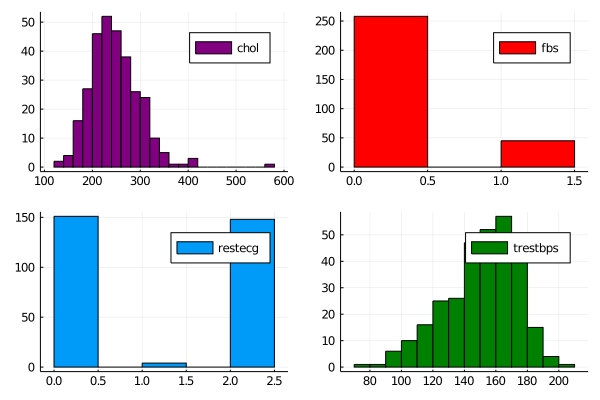

In [184]:
h5 = histogram(df[!, 5], label = "chol", colour="purple")
h6 = histogram(df[!, 6], label = "fbs", colour="red")
h7 = histogram(df[!, 7], label = "slope", clour="blue")
h8 = histogram(df[!, 8], label = "trestbps", colour="green")
plot(h5, h6, h7,h8, layout=4)

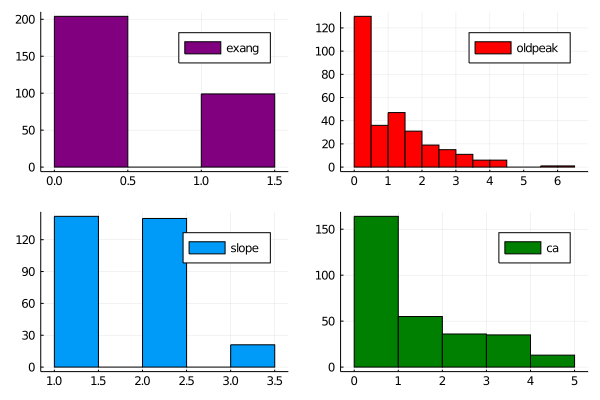

In [37]:
h9 = histogram(df[!, 9], label = "exang", colour="purple")
h10 = histogram(df[!, 10], label = "oldpeak", colour="red")
h11 = histogram(df[!, 11], label = "slope", clour="blue")
h12 = histogram(df[!, 14], label = "ca", colour="green")
plot(h9, h10, h11, h12, layout=4)